<img src="./images/happiness_report_2023.png" width="400" style="margin-left:0">

In [44]:
import pandas as pd

happiness_df = pd.read_csv('./datasets/happiness_report_2023.csv')

happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.804,1.888,1.585,0.535,0.772,0.126,0.535
1,Denmark,Western Europe,7.586,1.949,1.548,0.537,0.734,0.208,0.525
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
4,Netherlands,Western Europe,7.403,1.942,1.488,0.545,0.672,0.251,0.394
...,...,...,...,...,...,...,...,...,...
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117
134,Sierra Leone,Sub-Saharan Africa,3.138,0.670,0.540,0.092,0.371,0.193,0.051
135,Lebanon,Middle East and North Africa,2.392,1.417,0.476,0.398,0.123,0.061,0.027


In [45]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       137 non-null    object 
 1   region                        137 non-null    object 
 2   happiness_score               137 non-null    float64
 3   gdp_per_capita                137 non-null    float64
 4   social_support                137 non-null    float64
 5   healthy_life_expectancy       136 non-null    float64
 6   freedom_to_make_life_choices  137 non-null    float64
 7   generosity                    137 non-null    float64
 8   perceptions_of_corruption     137 non-null    float64
dtypes: float64(7), object(2)
memory usage: 9.8+ KB


In [46]:
happiness_df.describe().T

,count,mean,std,min,25%,50%,75%,max
happiness_score,137.0,5.539796,1.139929,1.859,4.7240,5.6840,6.3340,7.804
gdp_per_capita,137.0,1.406985,0.432963,0.000,1.0990,1.4490,1.7980,2.200
social_support,137.0,1.156212,0.326322,0.000,0.9620,1.2270,1.4010,1.620
healthy_life_expectancy,136.0,0.366176,0.156691,0.000,0.2485,0.3895,0.4875,0.702
freedom_to_make_life_choices,137.0,0.540000,0.149501,0.000,0.4550,0.5570,0.6560,0.772
generosity,137.0,0.148474,0.076053,0.000,0.0970,0.1370,0.1990,0.422
perceptions_of_corruption,137.0,0.145898,0.126723,0.000,0.0600,0.1110,0.1870,0.561


In [47]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [48]:
happiness_df['healthy_life_expectancy'] = happiness_df['healthy_life_expectancy'].fillna(happiness_df['healthy_life_expectancy'].mean())

In [49]:
happiness_df.isna().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
dtype: int64

In [50]:
!pip install seaborn

#### 가설 1. 삶의 선택에 있어 자유로움의 척도가 낮을수록 국가 내 부패에 대한 인식의 척도가 낮다.

In [62]:
import numpy as np
from scipy.stats import iqr

happiness_Q1 = np.percentile(happiness_df['perceptions_of_corruption'], 25)
happiness_Q3 = np.percentile(happiness_df['perceptions_of_corruption'], 75)

iqr_value = iqr(happiness_df['perceptions_of_corruption'])
print(iqr_value)

lower_bound = happiness_Q1 - 0.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

0.10250000000000001
정상치 범위: 0.007749999999999993 ~ 0.31525000000000003


In [63]:
condition1 = happiness_df['perceptions_of_corruption'] >= lower_bound
condition2 = happiness_df['perceptions_of_corruption'] <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
10,Austria,Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
11,Australia,North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
14,United States,North America and ANZ,6.894,1.980,1.460,0.390,0.557,0.210,0.172
...,...,...,...,...,...,...,...,...,...
130,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117


In [64]:
import numpy as np
from scipy.stats import iqr

happiness_Q1 = np.percentile(happiness_df['freedom_to_make_life_choices'], 25)
happiness_Q3 = np.percentile(happiness_df['freedom_to_make_life_choices'], 75)

iqr_value = iqr(happiness_df['freedom_to_make_life_choices'])
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

0.176
정상치 범위: 0.19 ~ 0.894


In [65]:
condition1 = happiness_df['freedom_to_make_life_choices'] >= lower_bound
condition2 = happiness_df['freedom_to_make_life_choices'] <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
10,Austria,Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
11,Australia,North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
14,United States,North America and ANZ,6.894,1.980,1.460,0.390,0.557,0.210,0.172
...,...,...,...,...,...,...,...,...,...
130,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117


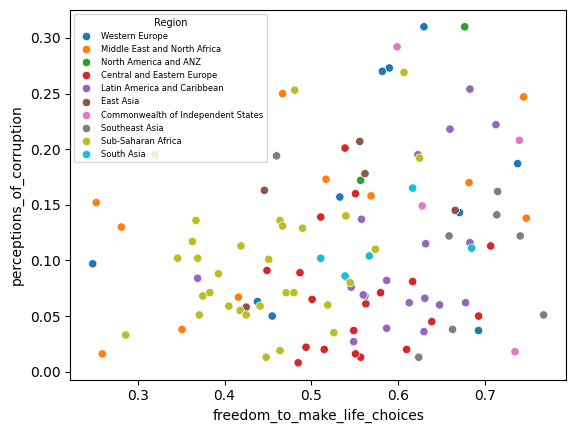

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x='freedom_to_make_life_choices',
    y='perceptions_of_corruption',
    data=happiness_df,
    hue='region'
)
plt.legend(title='Region', fontsize=6, title_fontsize=7)
plt.show()

#### 선택의 자유도가 낮은 국가의 데이터가 많이 없고 분포가 많이 되어 있어 가설을 증명하기에 무리가 있다.

#### 가설 2. 행복지수가 높을 수록 건강한 기대 수명이 높다.

In [56]:
import numpy as np
from scipy.stats import iqr

happiness_Q1 = np.percentile(happiness_df['happiness_score'], 25)
happiness_Q3 = np.percentile(happiness_df['happiness_score'], 75)

iqr_value = iqr(happiness_df['happiness_score'])
print(iqr_value)

lower_bound = happiness_Q1 - 1.5 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

1.44625
정상치 범위: 2.587375 ~ 8.372375


In [57]:
condition1 = happiness_df['happiness_score'] >= lower_bound
condition2 = happiness_df['happiness_score'] <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
10,Austria,Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
11,Australia,North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
12,Canada,North America and ANZ,6.961,1.881,1.484,0.541,0.656,0.218,0.364
...,...,...,...,...,...,...,...,...,...
130,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117


In [70]:
import numpy as np
from scipy.stats import iqr

happiness_Q1 = np.percentile(happiness_df['healthy_life_expectancy'], 25)
happiness_Q3 = np.percentile(happiness_df['healthy_life_expectancy'], 75)

iqr_value = iqr(happiness_df['healthy_life_expectancy'])
print(iqr_value)

lower_bound = happiness_Q1 - 1.1 * iqr_value
upper_bound = happiness_Q3 + 1.5 * iqr_value
print(f'정상치 범위: {lower_bound} ~ {upper_bound}')

0.203
정상치 범위: 0.014199999999999963 ~ 0.745


In [71]:
condition1 = happiness_df['healthy_life_expectancy'] >= lower_bound
condition2 = happiness_df['healthy_life_expectancy'] <= upper_bound
condition = condition1 & condition2

happiness_df = happiness_df[condition]
happiness_df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
2,Iceland,Western Europe,7.530,1.926,1.620,0.559,0.738,0.250,0.187
3,Israel,Middle East and North Africa,7.473,1.833,1.521,0.577,0.569,0.124,0.158
10,Austria,Western Europe,7.097,1.927,1.382,0.535,0.630,0.191,0.310
11,Australia,North America and ANZ,7.095,1.899,1.497,0.532,0.677,0.242,0.310
14,United States,North America and ANZ,6.894,1.980,1.460,0.390,0.557,0.210,0.172
...,...,...,...,...,...,...,...,...,...
130,Malawi,Sub-Saharan Africa,3.495,0.637,0.479,0.189,0.490,0.139,0.129
131,Botswana,Sub-Saharan Africa,3.435,1.471,1.041,0.087,0.480,0.021,0.071
132,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.531,0.784,0.105,0.375,0.183,0.068
133,Zimbabwe,Sub-Saharan Africa,3.204,0.758,0.881,0.069,0.363,0.112,0.117


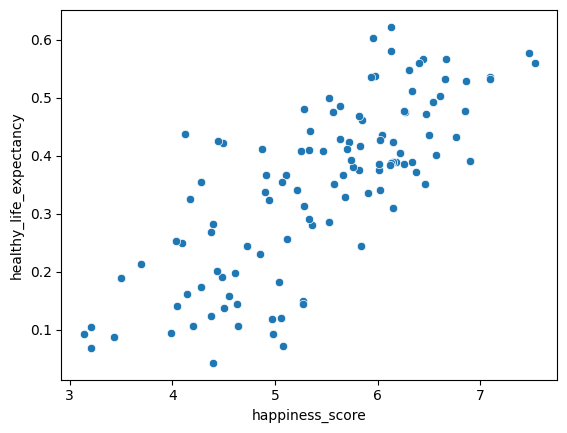

In [72]:
sns.scatterplot(x='happiness_score', y='healthy_life_expectancy', data=happiness_df)
plt.show()

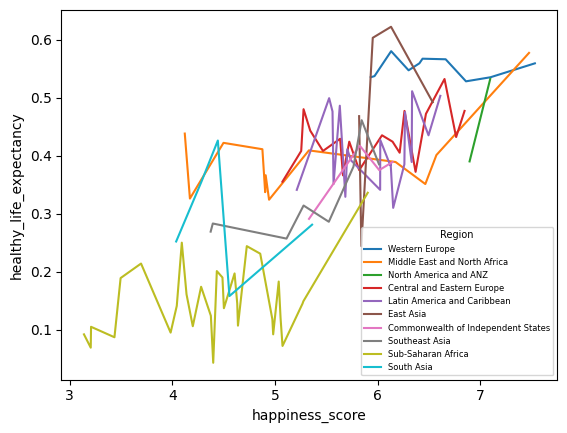

In [74]:
sns.lineplot(data=happiness_df, x='happiness_score', y='healthy_life_expectancy', hue='region')
plt.legend(title='Region', fontsize=6, title_fontsize=7)
plt.show()

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_25368\1191165220.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


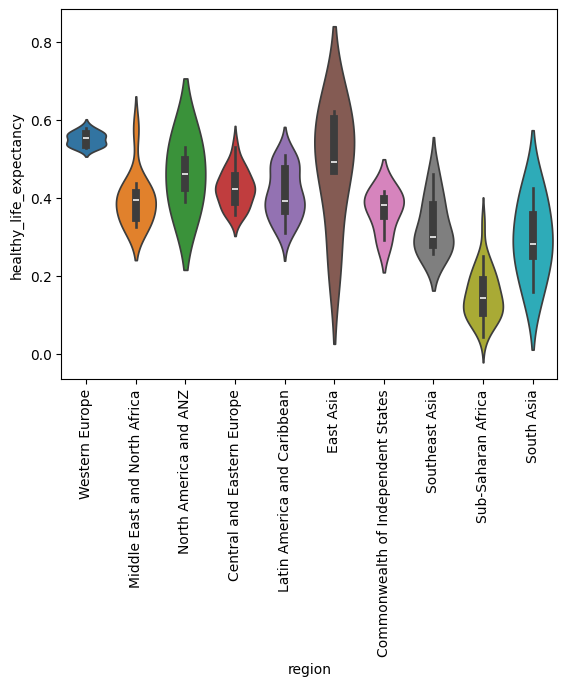

C:\Users\SAMSUNG\AppData\Local\Temp\ipykernel_25368\1191165220.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  line.set_xticklabels(line.get_xticklabels(), rotation=90)


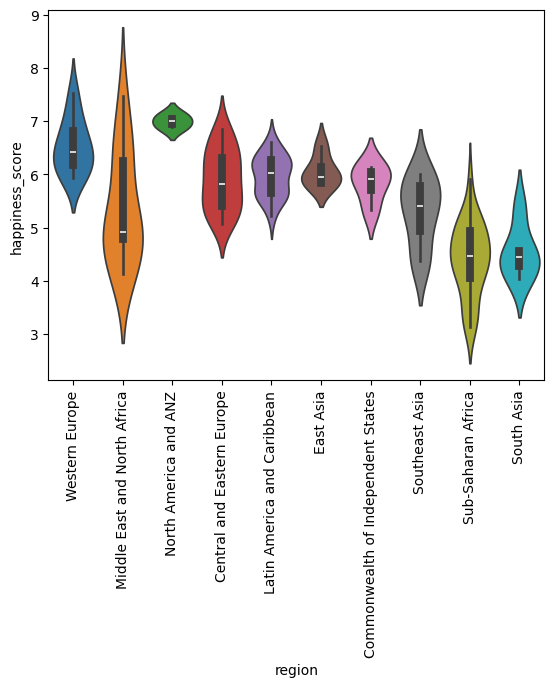

In [76]:
line = sns.violinplot(x='region', y='healthy_life_expectancy', data=happiness_df, hue='region')
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()

line = sns.violinplot(x='region', y='happiness_score', data=happiness_df, hue='region')
line.set_xticklabels(line.get_xticklabels(), rotation=90)
plt.show()


#### 세계 지역별 행복지수와 건강한 기대수명 분석 보고서

1. 행복지수와 건강한 기대수명 간 상관관계

분석 방법: 국가별 행복지수와 건강한 기대수명을 수집하여 산점도로 시각화하고 상관관계를 분석했다.

분석 결과: 행복지수가 높을수록 건강한 기대수명도 증가하는 경향이 관찰되었다.   
산점도에서 두 변수는 명확한 우상향 관계를 보여, 행복 수준이 높은 국가일수록 건강하게 오래 살 가능성이 높다는 가설을 지지한다.


2. 지역별 분포와 차이
건강한 기대수명

높은 평균: 동아시아(East Asia)와 서유럽(Western Europe)는 평균 건강 기대수명이 높고, 분포가 좁아 대부분의 국가가 높은 수준을 유지했다.

낮은 평균: 사하라 이남 아프리카(Sub-Saharan Africa)와 남아시아(South Asia)는 평균이 낮고, 분포 폭이 넓어 지역 내 국가 간 격차가 크다.

행복지수

높은 점수: 북미·오세아니아(North America and ANZ), 서유럽(Western Europe)에서 상대적으로 높은 행복지수.

낮은 점수: 사하라 이남 아프리카와 남아시아는 낮은 행복지수.

지역별 특징

라틴아메리카(Latin America and Caribbean)는 행복지수는 중간 수준이지만, 건강 기대수명 분포가 넓어 지역 내 격차가 존재한다.


3. 결론 및 시사점  

행복지수가 높은 국가일수록 건강한 기대수명도 높은 경향이 확인된다.
특히 동아시아와 서유럽, 북미·오세아니아 지역에서 두 변수 모두 높은 수준을 보여, 행복과 건강의 긍정적 상관관계를 뚜렷하게 확인할 수 있다.
정책적 시사점: 단순 평균뿐 아니라 지역 내 격차를 고려하여 행복과 건강을 동시에 증진할 수 있는 맞춤형 전략 필요.